In [2]:
### library/modules = toolbox

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
### load data
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## 1. Format-analysis

In [6]:
iris.dtypes ## type données encodées != type de variable statistiques (voir plus bas)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
INFO = pd.concat([iris.dtypes, iris.isna().sum(),iris.nunique(), iris.count()], axis = 1)
INFO.columns = ['dtypes','isna_sum','nunique', 'sum']
INFO

,dtypes,isna_sum,nunique,sum
sepal_length,float64,0,35,150
sepal_width,float64,0,23,150
petal_length,float64,0,43,150
petal_width,float64,0,22,150
species,object,0,3,150


In [9]:
iris.shape

(150, 5)

In [20]:
### posibility to change datatypes to reduce memory usage and be more efficent when calculating results
iris_temp = iris.copy()
iris_temp['species'] = iris_temp['species'].astype('category') ### bool,'category'

iris_temp.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

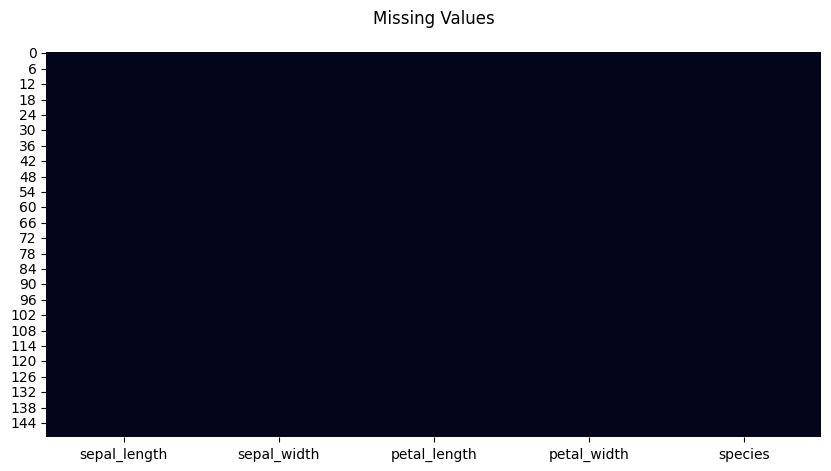

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [21]:
plt.figure(figsize=(10, 5))

plt.title('Missing Values\n')

sns.heatmap(iris.isnull(), cbar=False) # cbar = Color bar de la heatmap non affichée
plt.show()

iris.isnull().sum()

###  Target analysis
specific analysis of the center of study/prediction

In [22]:
### referencing for systematic use of this template
target = 'species'

In [23]:
iris[target].unique() ## quel type de variable statistique ? Booléen, Categorie !

array(['setosa', 'versicolor', 'virginica'], dtype=object)

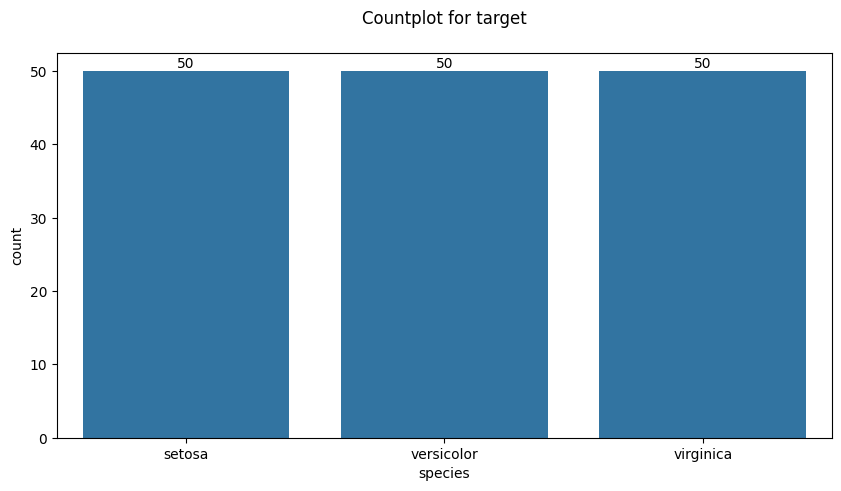

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [24]:
### recommendations:
### if the column is a categorical variable: -> barplot for visualisation
### if the column is a numerical variable: -> histogram for visualisation

plt.figure(figsize=(10, 5))
plt.title('Countplot for target\n')

ax = sns.countplot(data=iris, x=target) # countplot = barplot, count, pas de groupby à faire

### show the data-labels for each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()



### show same info but in a table/list/series
print(iris[target].value_counts())

In [25]:
### elementary statistics

iris[[target]].describe() ## int / bool -> somme et/ou moyenne possible

,species
count,150
unique,3
top,setosa
freq,50


###  Features analysis: setup

features == explicative columns

In [26]:
feat_cols = iris.columns.to_list() 
feat_cols.remove(target)
feat_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

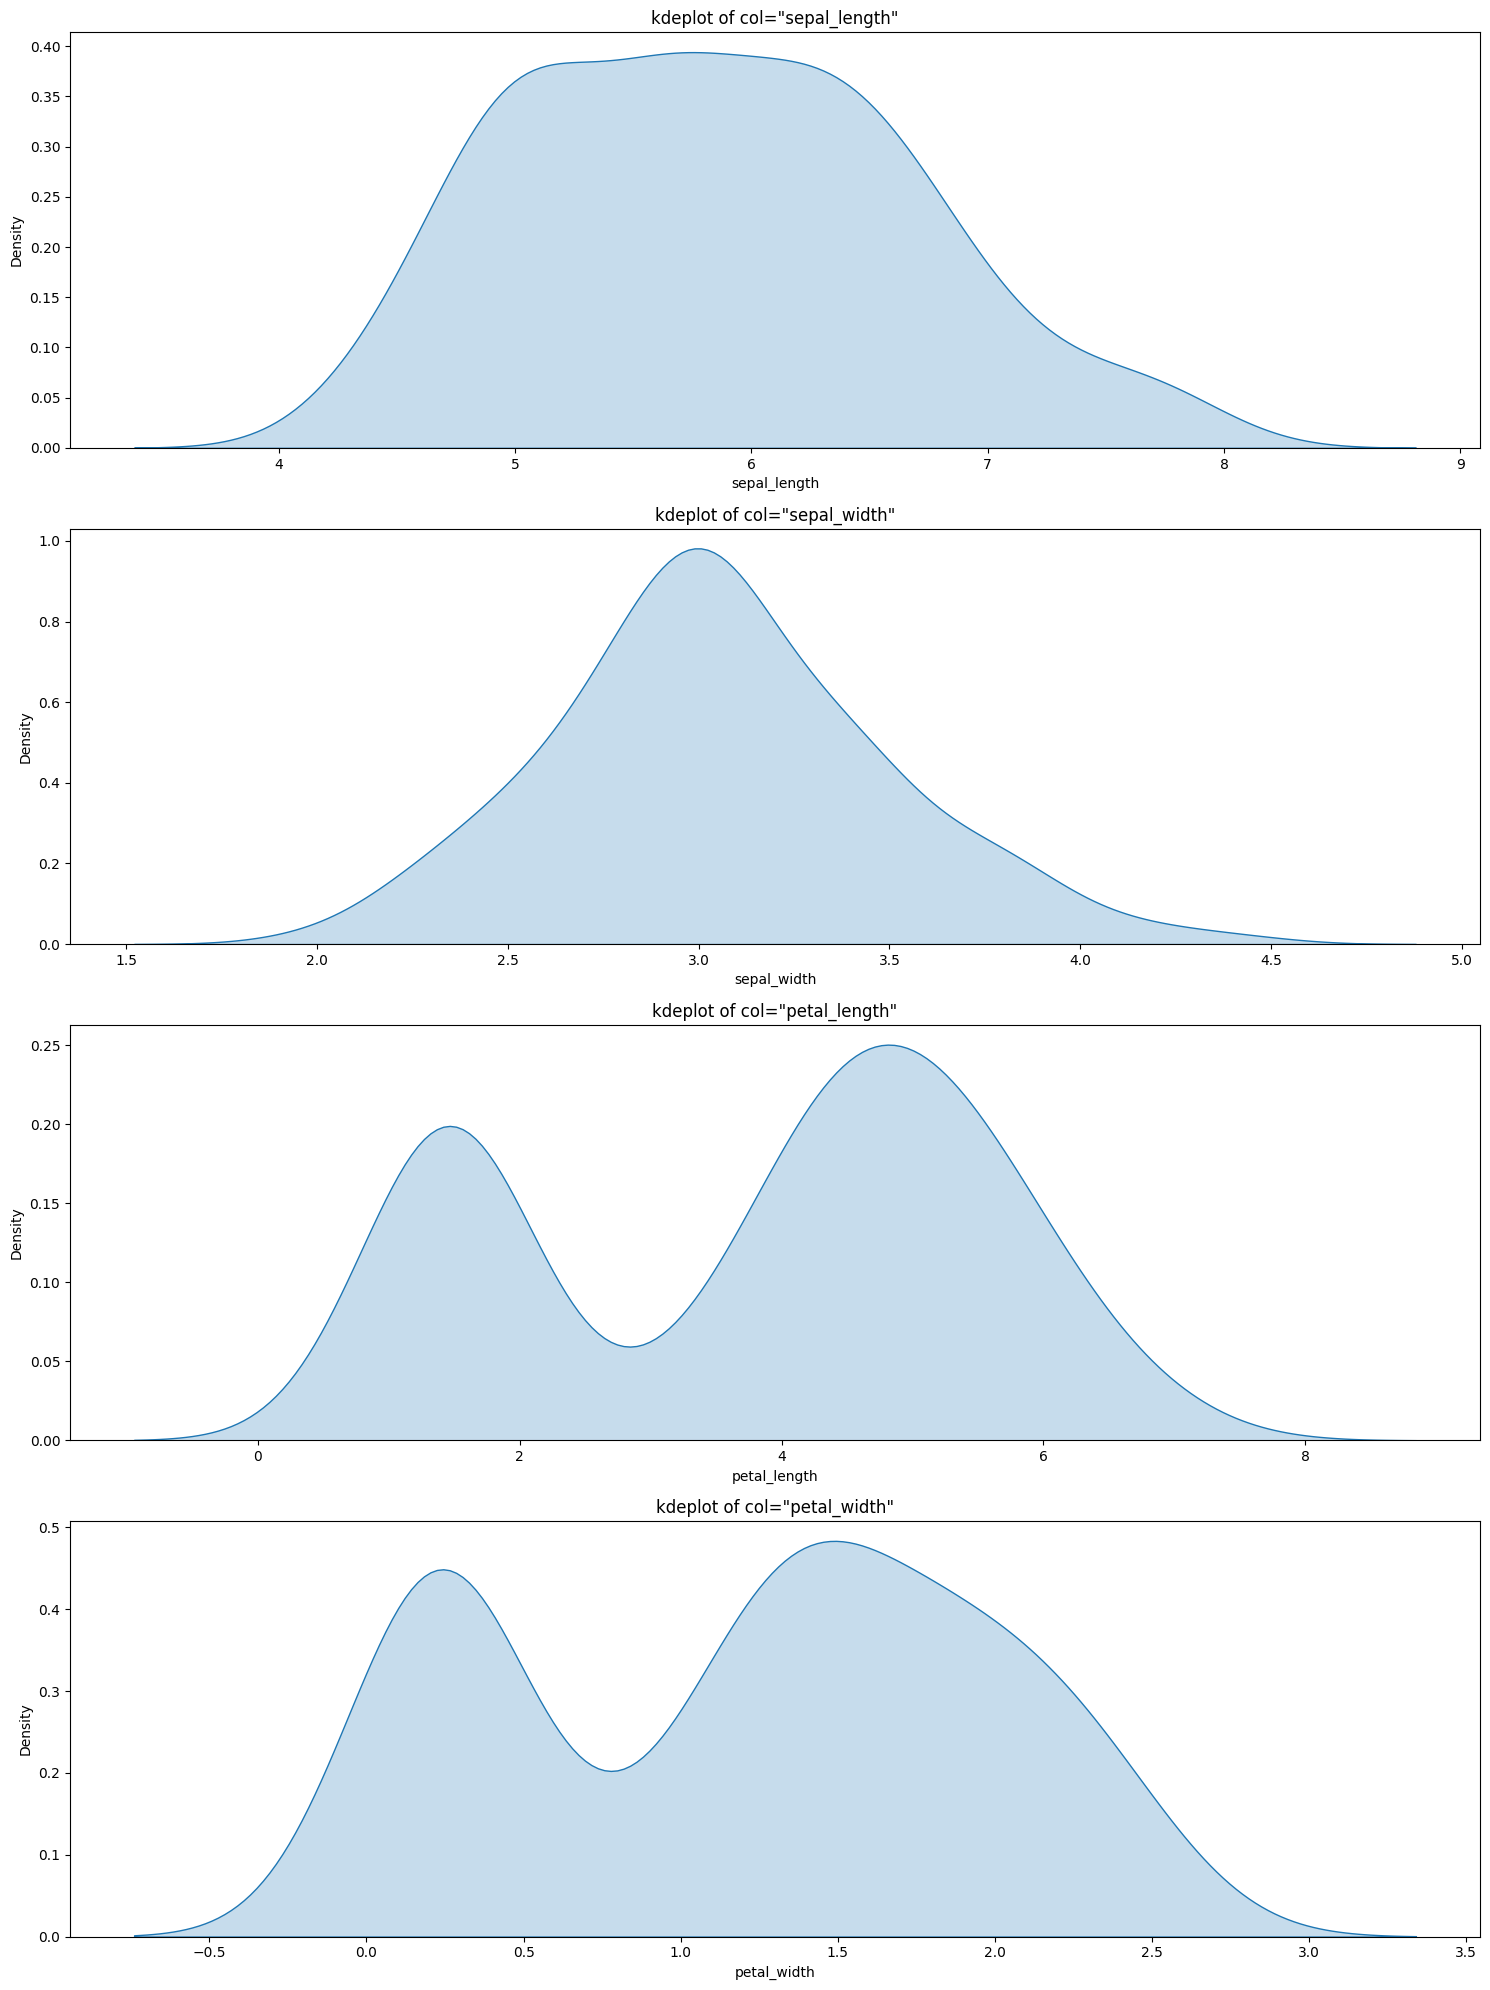

In [27]:
### number of numerical features
N_num = len(feat_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a 'kdeplot' "Kernel density estimate plot"
for i in np.arange(N_num):
    col = feat_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### Kernel Density Estimator +-= smoothed histogram
    sns.kdeplot(data=iris, x=col, fill=True) 

### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

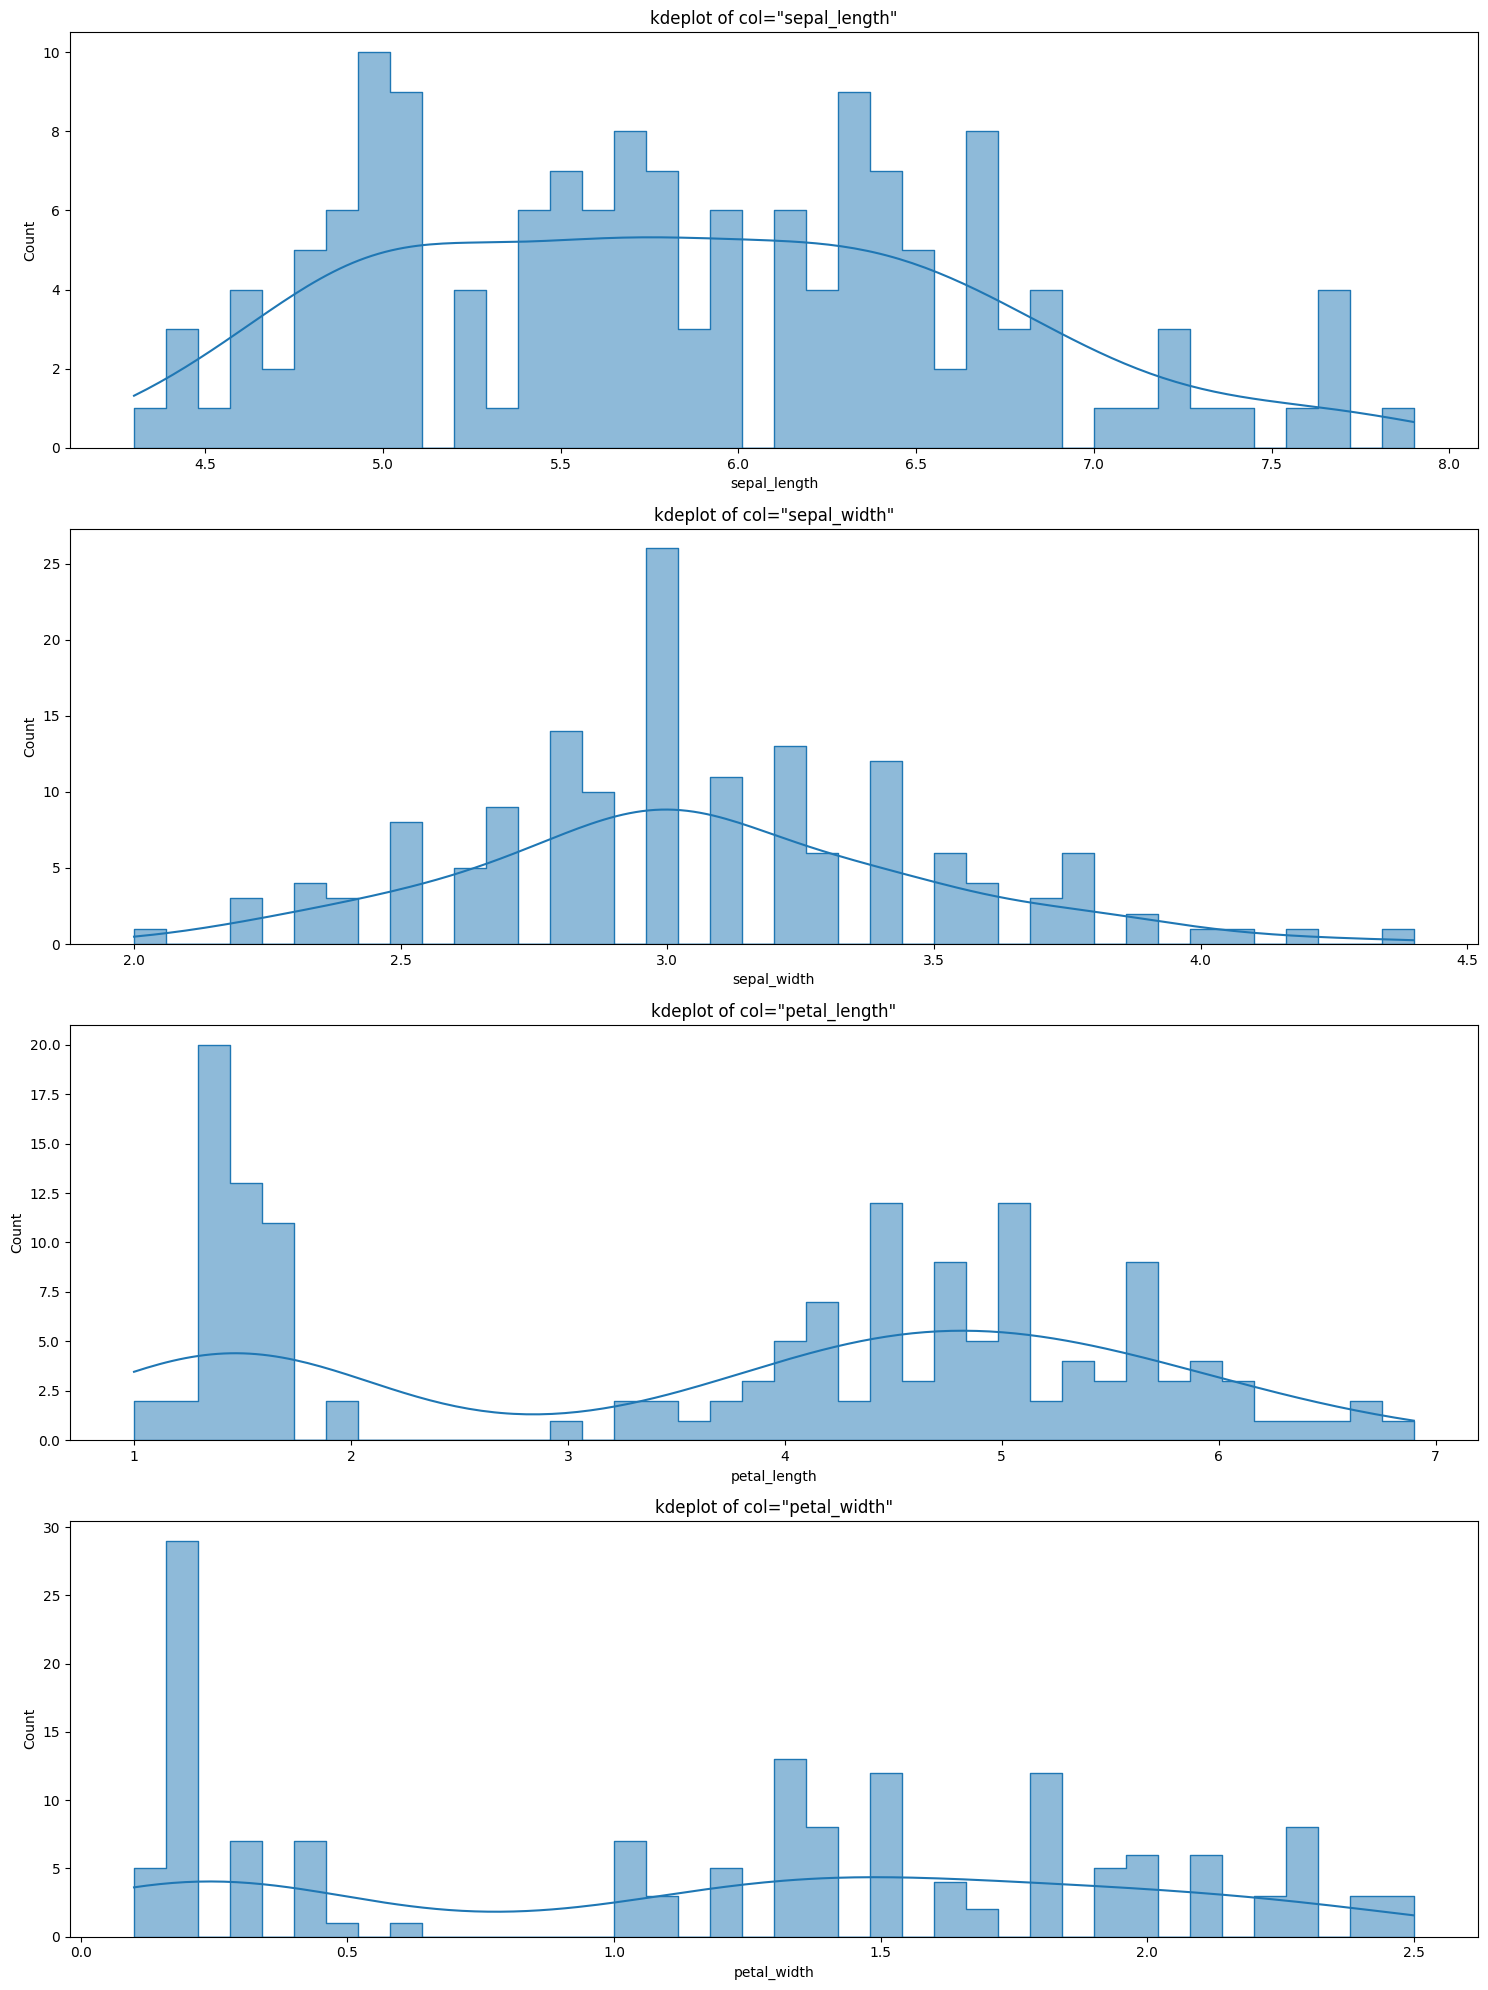

In [28]:
### number of numerical features
N_num = len(feat_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a 'histogram'
for i in np.arange(N_num):
    col = feat_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### simple histogram
    sns.histplot(data=iris, x=col
                      , fill=True
                      , element="step"
                      , stat = 'count' # 'count','density','percent', ...
                      , discrete=False
                      , kde=True
                      , bins=40
                     )

### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

In [29]:
display(iris[feat_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### 3.b. Numerical vs target


recommendations:  
__feature vs target:__
- _numerical vs categorical:_  
        histogram of feature,  
        color/hue based on target 
        
        groupby(target)
    

- _numerical vs numerical:_  
        scatter/pair plot with 
        feature on x-axis, target on y-axis
        
        no groupby

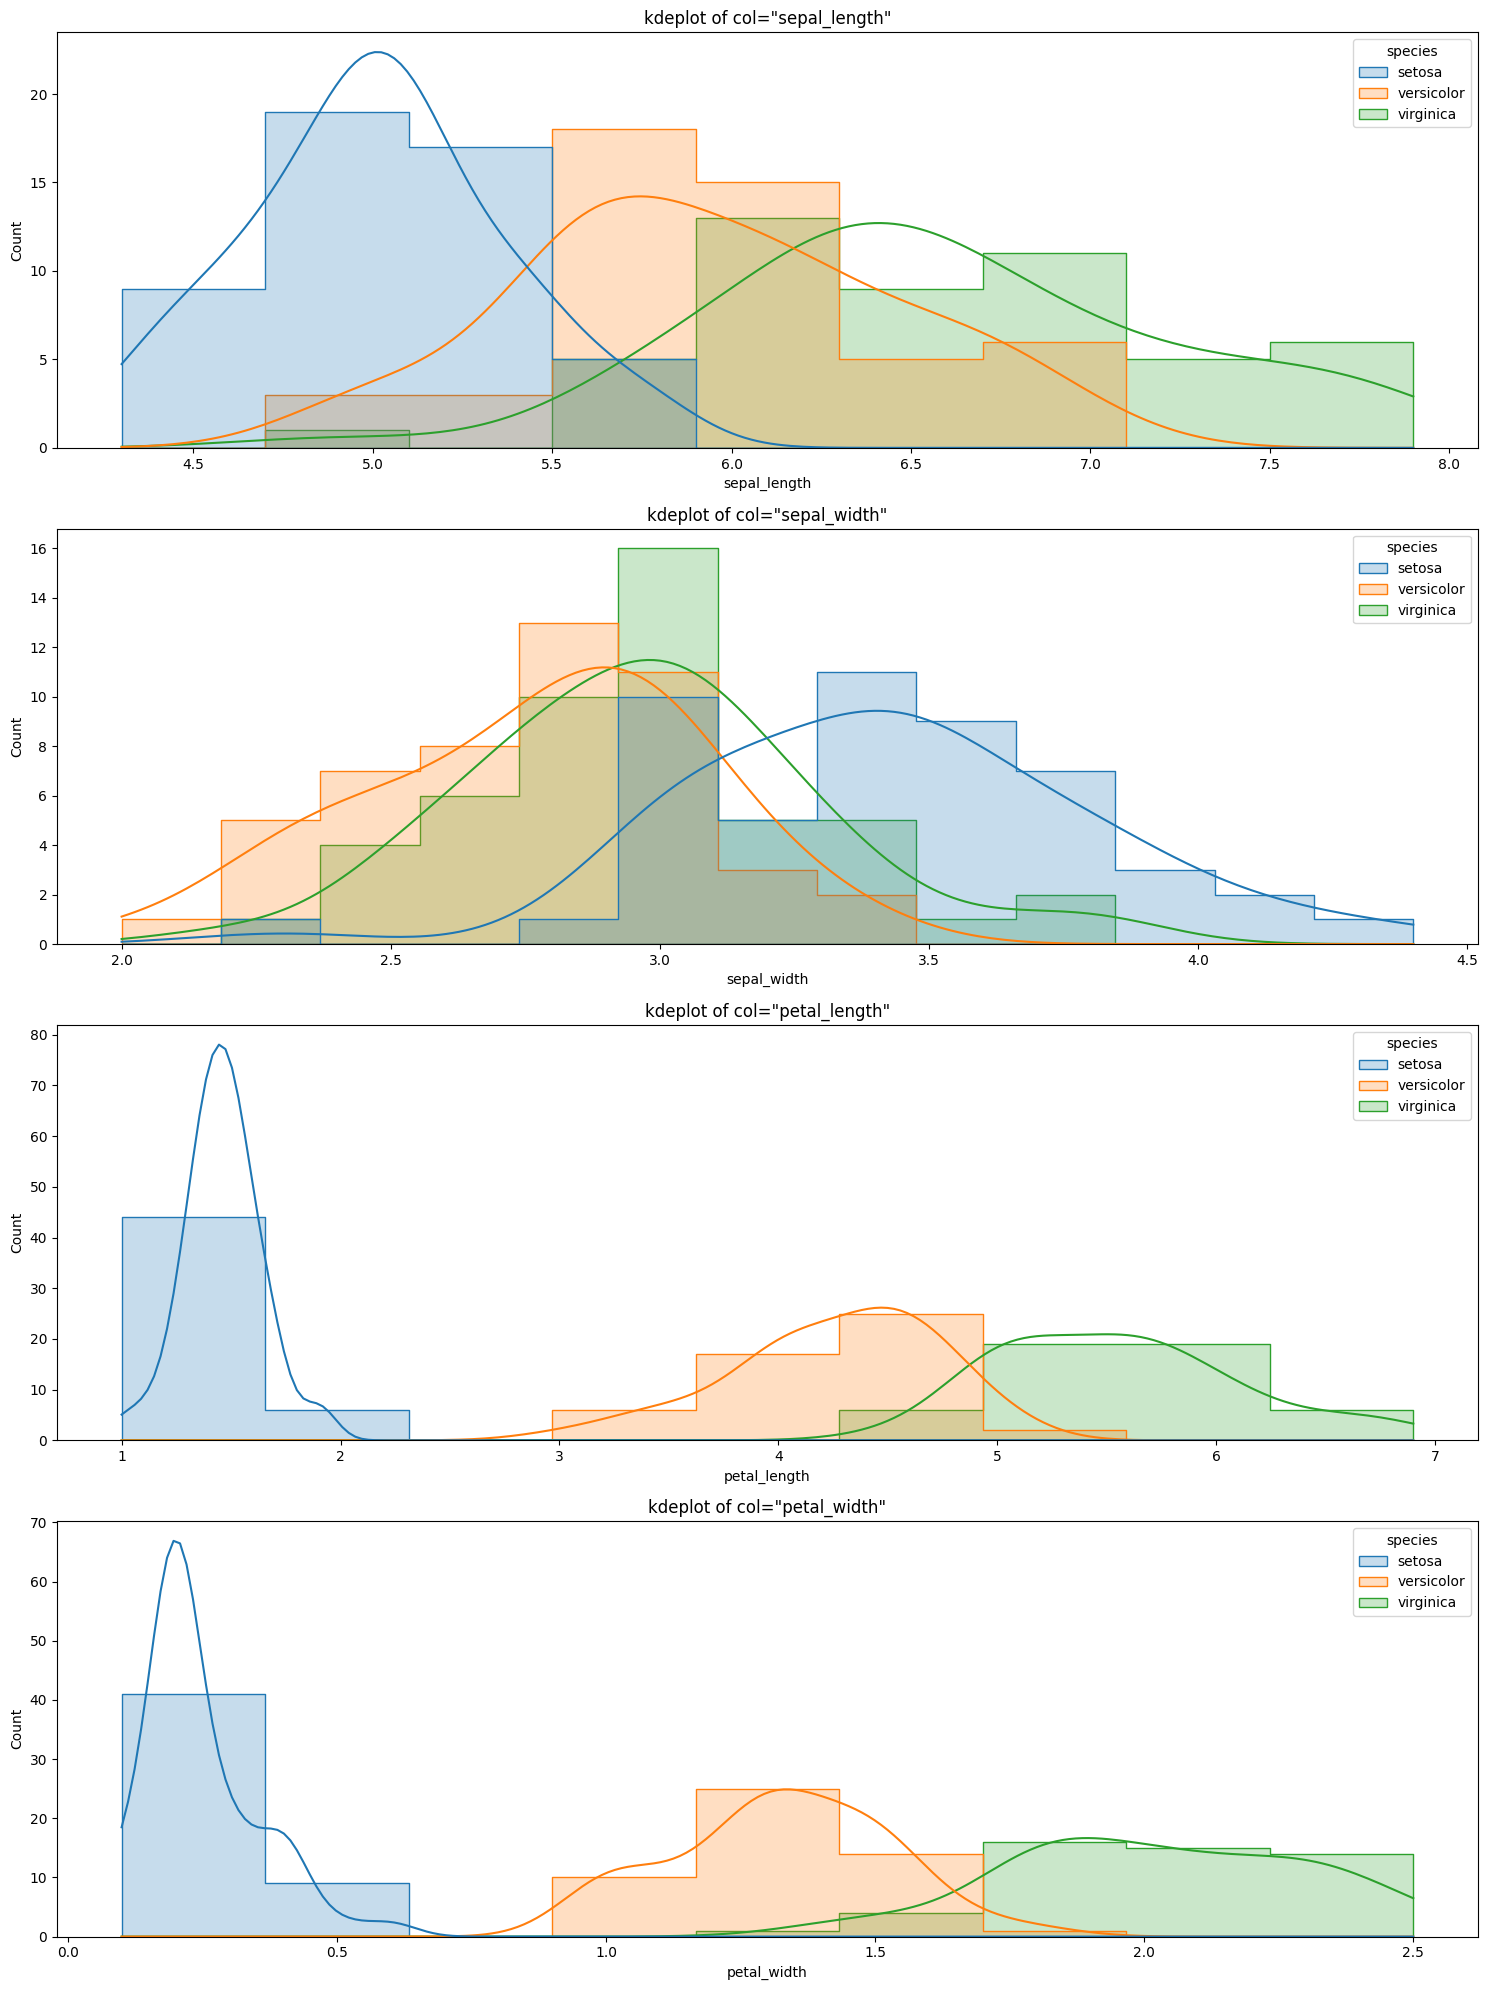

In [30]:
### number of numerical features
N_num = len(feat_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a 'histogram'
for i in np.arange(N_num):
    col = feat_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### simple histogram, colored by target
    sns.histplot(data=iris, x=col
                     , fill=True
                     , element="step"
                     , stat = 'count'# 'count','density','percent', ...
                     , discrete=False
                     , kde=True
                     
                     #, common_norm=False
                     
                     , hue = target # give color based on values of categorical target  
                     #, multiple = 'stack'
                     )

### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

In [31]:
### groupby-statistics

for col in feat_cols:
    display(iris[[col,target]].groupby(target).describe())

sepal_length                                            
                  count   mean       std  min    25%  50%  75%  max
species                                                            
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

sepal_width                                              
                 count   mean       std  min    25%  50%    75%  max
species                                                             
setosa            50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4
versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

petal_length                                             
                  count   mean       std  min  25%   50%    75%  max
species                                                             
setosa             50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

petal_width                                          
                 count   mean       std  min  25%  50%  75%  max
species                                                         
setosa            50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6
versicolor        50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8
virginica         50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

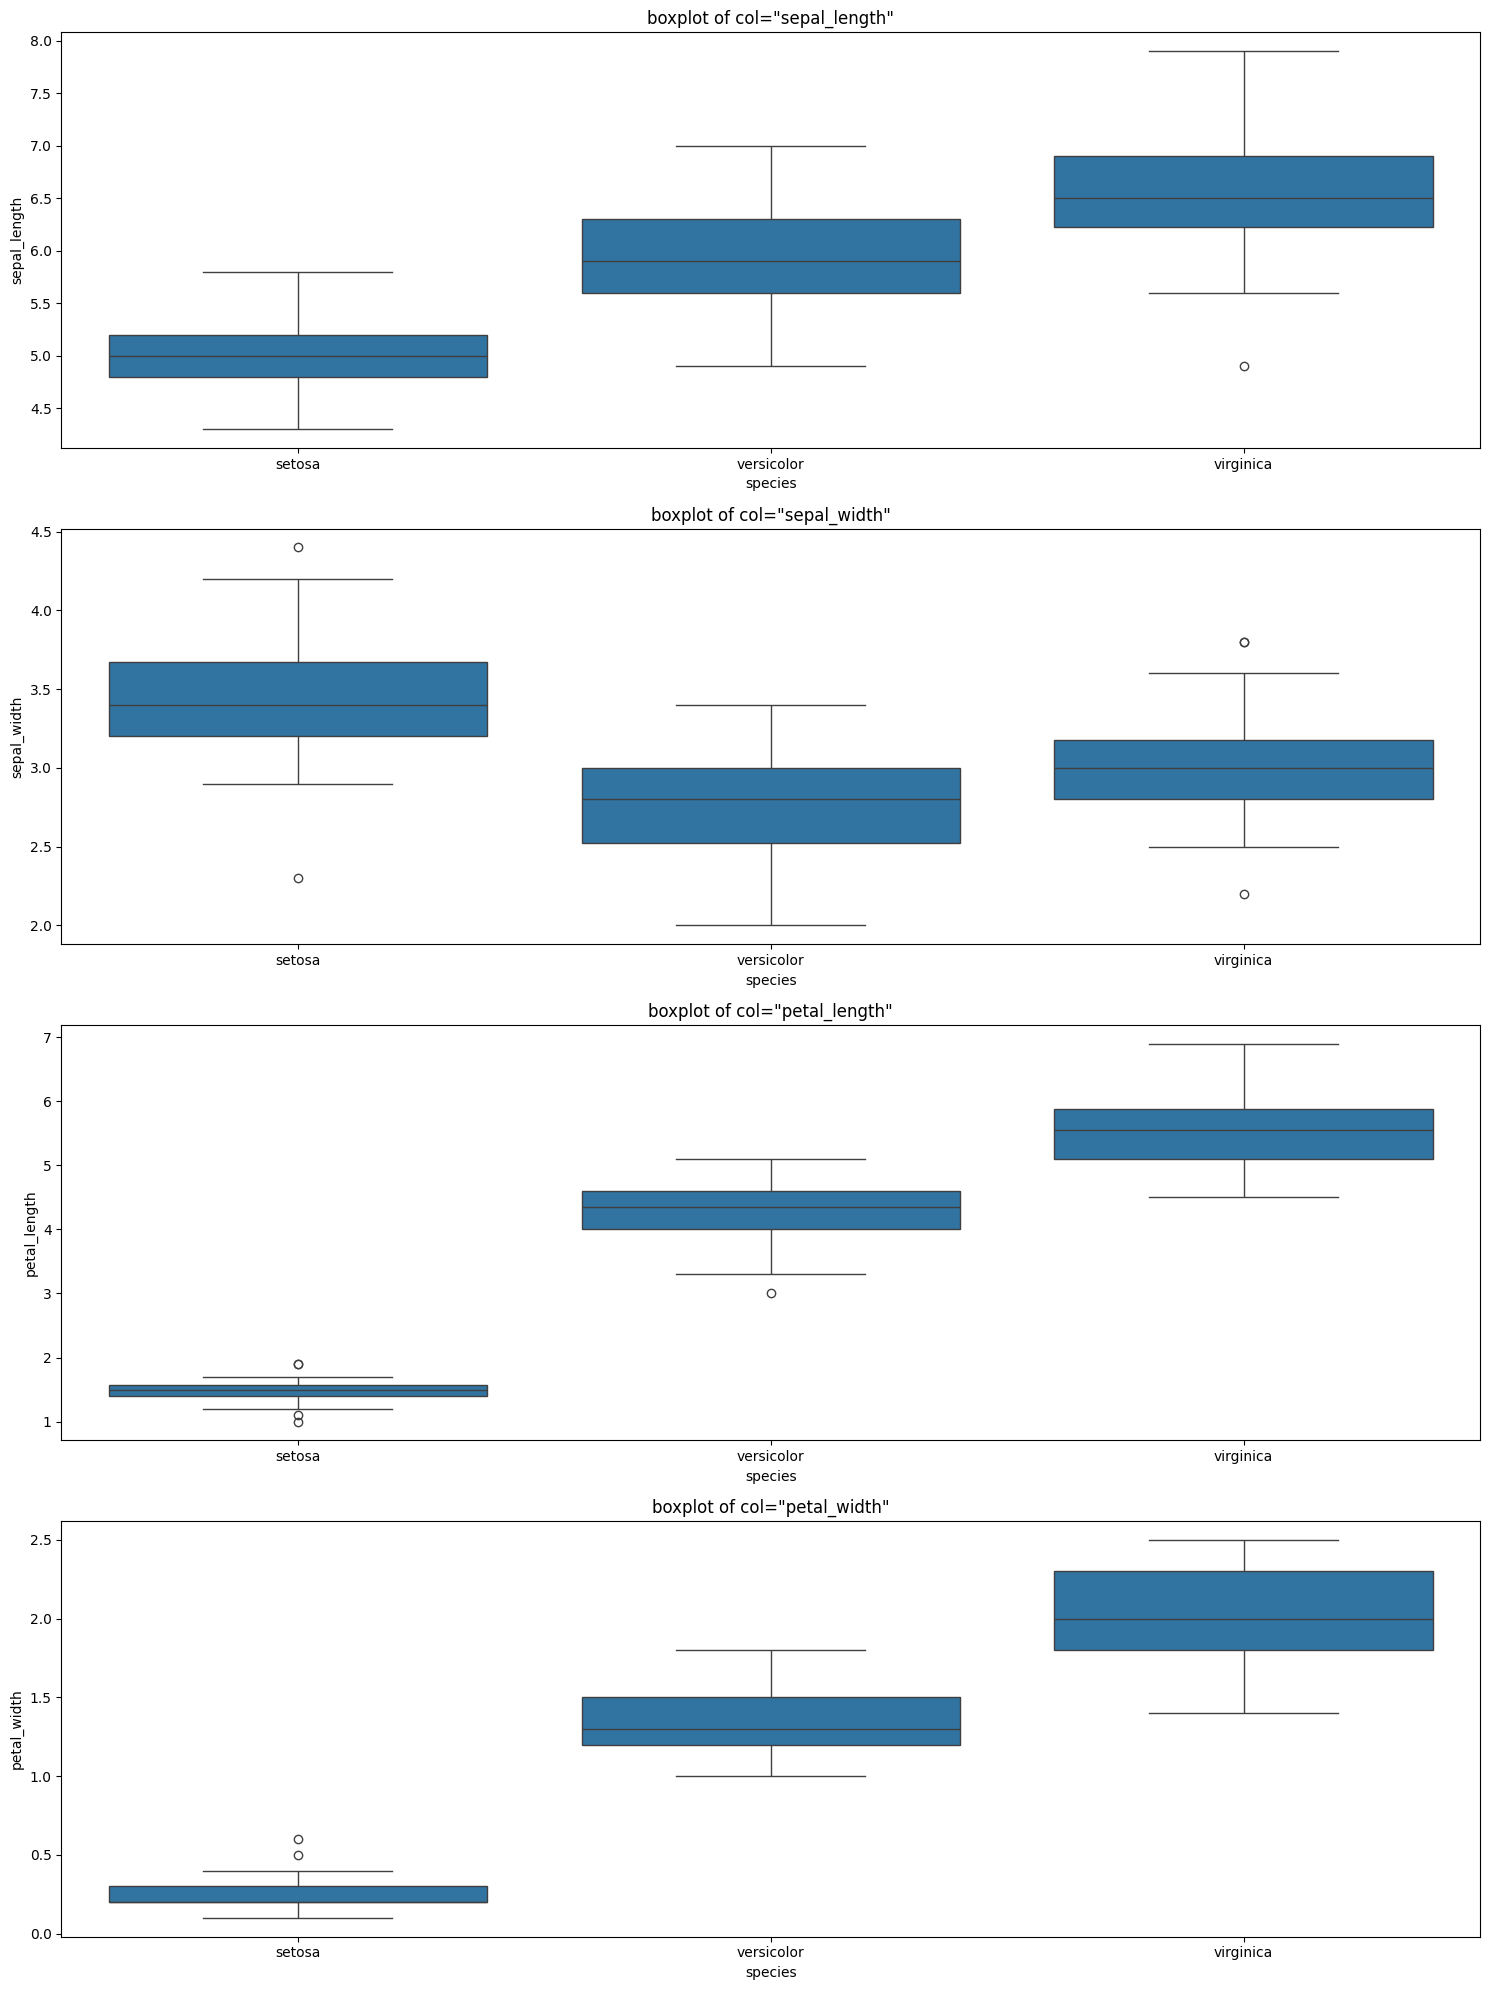

In [32]:
### number of numerical features
N_num = len(feat_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a boxplot
for i in np.arange(N_num):
    col = feat_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'boxplot of col="{col}"')
    
    ### boxplot uses Quartiles, median from data 
    sns.boxplot(data=iris, x=target, y=col)
                    
### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

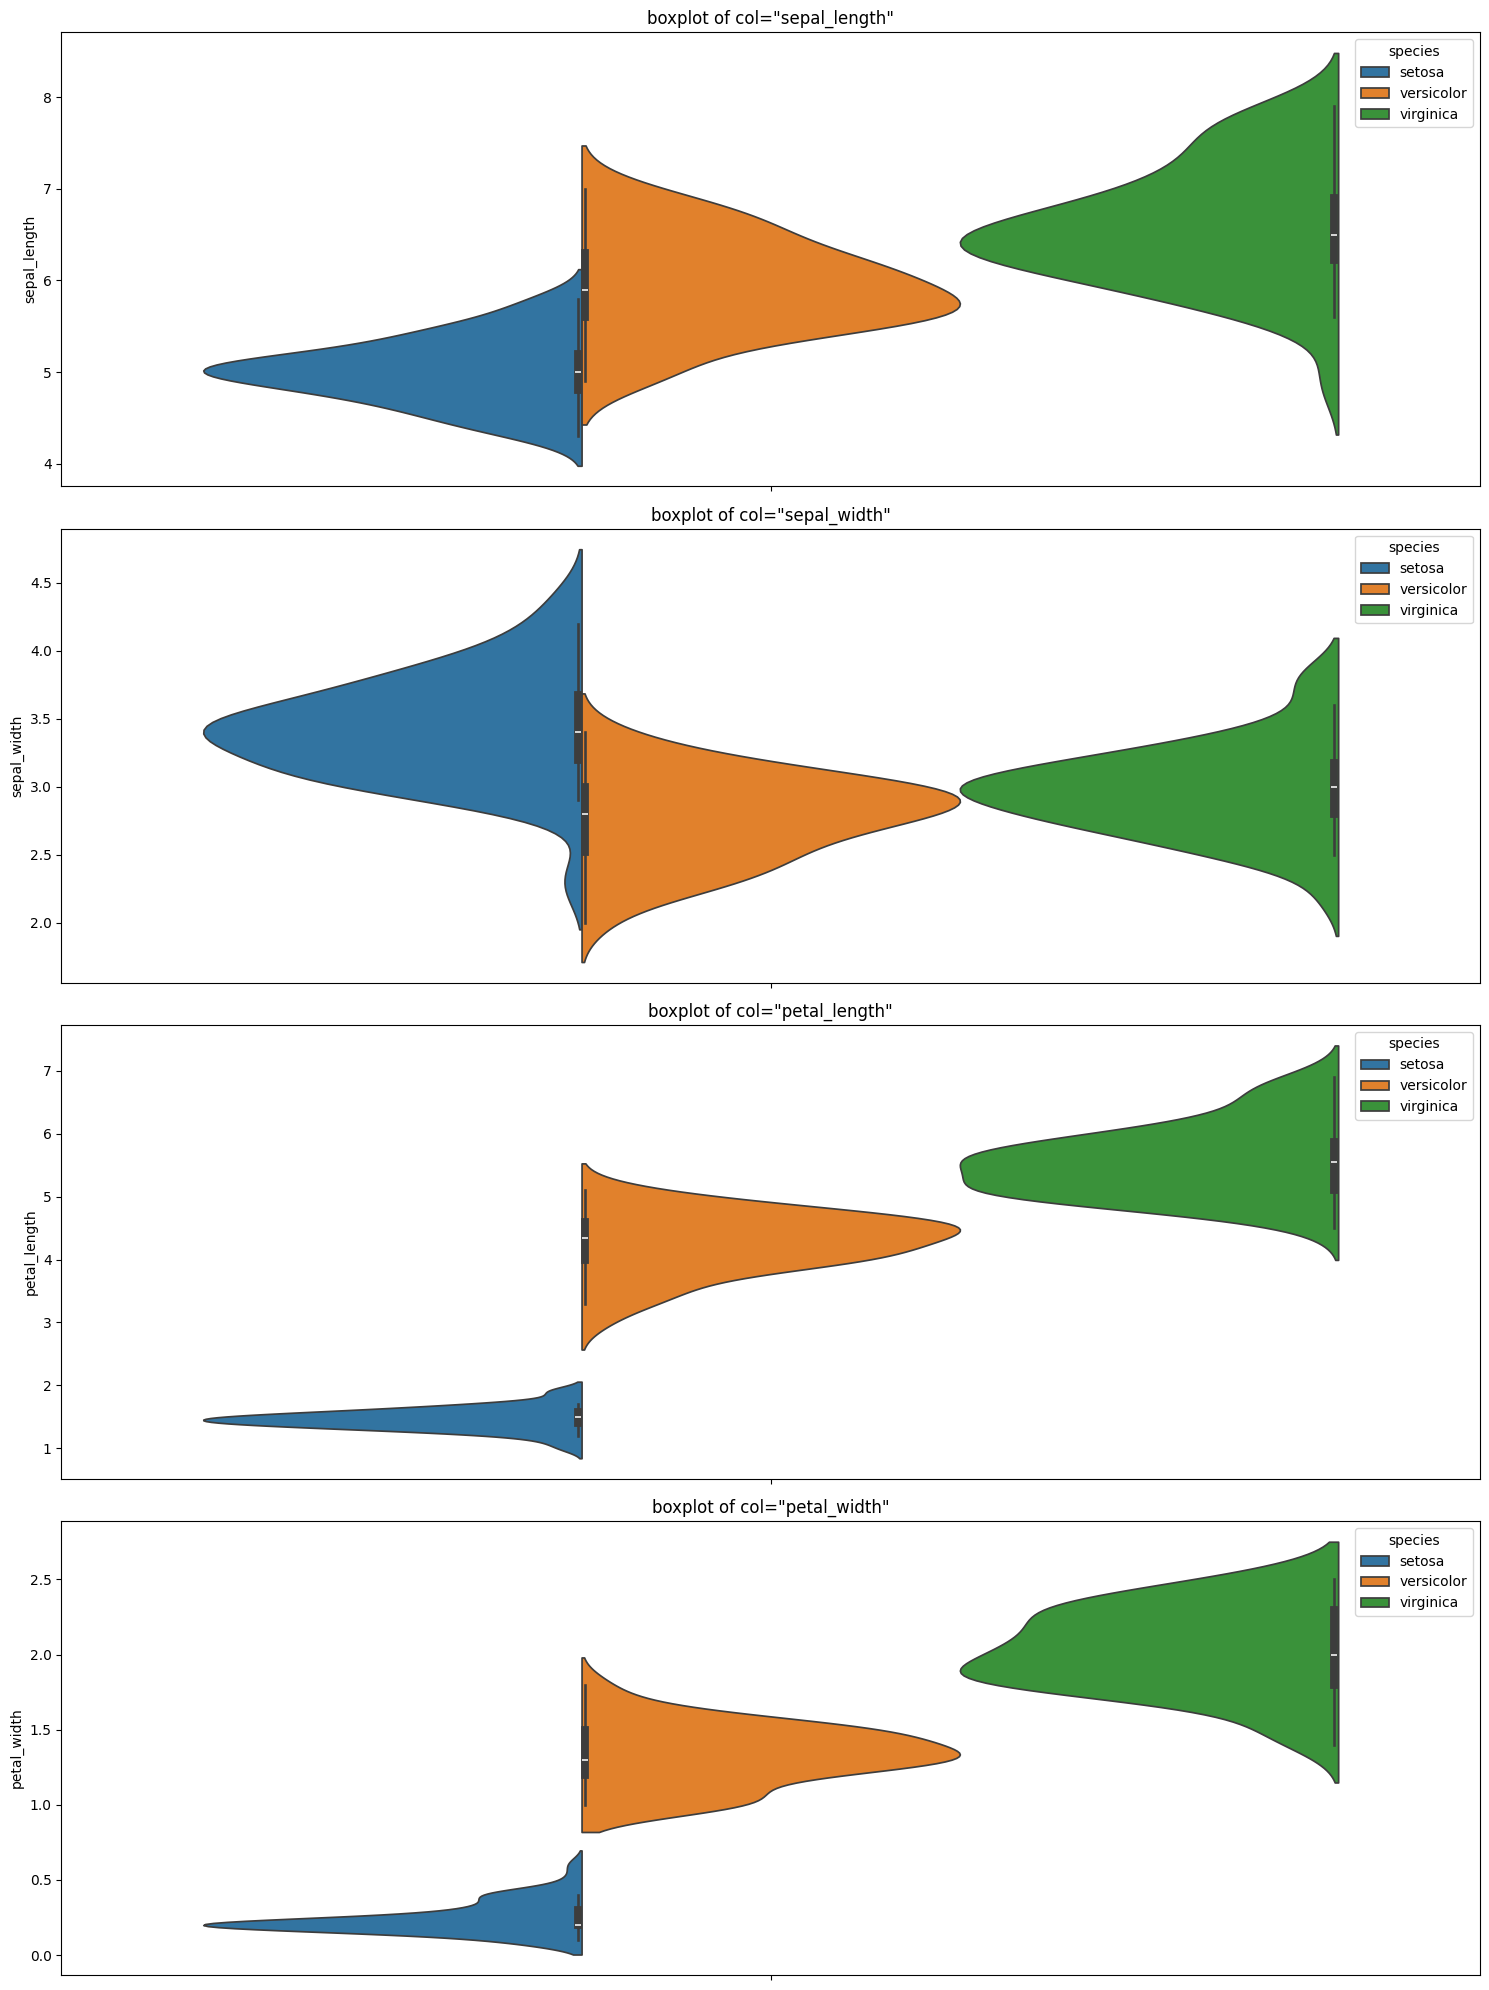

In [33]:
### number of numerical features
N_num = len(feat_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 


### for each numerical feature plot a violinplot
for i in np.arange(N_num):
    col = feat_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'boxplot of col="{col}"')
    
    ### violinplot 
    sns.violinplot(data = iris , hue=target, y=col , split=True)
                    
### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

Correlations